## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [10]:
#Compile 模型
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model2 = build_mlp()
optimizer2 = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer2)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, 
          epochs=500,   #epoch測試 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2383 - accuracy: 0.5619 - val_loss: 1.4130 - val_accuracy: 0.5046
Epoch 2/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2208 - accuracy: 0.5665 - val_loss: 1.3748 - val_accuracy: 0.5171
Epoch 3/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1999 - accuracy: 0.5740 - val_loss: 1.3889 - val_accuracy: 0.5097
Epoch 4/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.1885 - accuracy: 0.5785 - val_loss: 1.3833 - val_accuracy: 0.5107
Epoch 5/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.1511 - accuracy: 0.5897 - val_loss: 1.3633 - val_accuracy: 0.5274
Epoch 6/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.1357 - accuracy: 0.5947 - val_loss: 1.3727 - val_accuracy: 0.5156
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 8s 155us/step - loss: 0.4411 - accuracy: 0.8428 - val_loss: 2.3966 - val_accuracy: 0.5027
Epoch 56/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.4370 - accuracy: 0.8432 - val_loss: 2.4306 - val_accuracy: 0.4972
Epoch 57/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.4509 - accuracy: 0.8399 - val_loss: 2.4897 - val_accuracy: 0.4937
Epoch 58/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.4440 - accuracy: 0.8409 - val_loss: 2.4426 - val_accuracy: 0.4979
Epoch 59/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.4256 - accuracy: 0.8489 - val_loss: 2.5231 - val_accuracy: 0.4919
Epoch 60/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.4225 - accuracy: 0.8493 - val_loss: 2.5260 - val_accuracy: 0.5023
Epoch 61/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.4049 - accuracy: 0.8572 - val

50000/50000 [==============================] - 7s 149us/step - loss: 0.2599 - accuracy: 0.9073 - val_loss: 3.9659 - val_accuracy: 0.4922
Epoch 110/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.2206 - accuracy: 0.9210 - val_loss: 4.0645 - val_accuracy: 0.4877
Epoch 111/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.2119 - accuracy: 0.9247 - val_loss: 4.1508 - val_accuracy: 0.4869
Epoch 112/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.2499 - accuracy: 0.9100 - val_loss: 4.0335 - val_accuracy: 0.4927
Epoch 113/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.2144 - accuracy: 0.9228 - val_loss: 4.1117 - val_accuracy: 0.4924
Epoch 114/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.2093 - accuracy: 0.9255 - val_loss: 4.2267 - val_accuracy: 0.4963
Epoch 115/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.2161 - accuracy: 0.9251

50000/50000 [==============================] - 7s 149us/step - loss: 0.1729 - accuracy: 0.9384 - val_loss: 5.1282 - val_accuracy: 0.4926
Epoch 164/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1588 - accuracy: 0.9452 - val_loss: 5.2919 - val_accuracy: 0.4938
Epoch 165/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1292 - accuracy: 0.9549 - val_loss: 5.2646 - val_accuracy: 0.4875
Epoch 166/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.2102 - accuracy: 0.9283 - val_loss: 5.1709 - val_accuracy: 0.4872
Epoch 167/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.1741 - accuracy: 0.9379 - val_loss: 5.3945 - val_accuracy: 0.4887
Epoch 168/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.1484 - accuracy: 0.9469 - val_loss: 5.2433 - val_accuracy: 0.4910
Epoch 169/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.1224 - accuracy: 0.9561

50000/50000 [==============================] - 7s 149us/step - loss: 0.1276 - accuracy: 0.9561 - val_loss: 6.2403 - val_accuracy: 0.4868
Epoch 218/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.2040 - accuracy: 0.9316 - val_loss: 6.0148 - val_accuracy: 0.4867
Epoch 219/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.1836 - accuracy: 0.9392 - val_loss: 5.8373 - val_accuracy: 0.4906
Epoch 220/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.1188 - accuracy: 0.9590 - val_loss: 5.9692 - val_accuracy: 0.4911
Epoch 221/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0827 - accuracy: 0.9708 - val_loss: 6.1369 - val_accuracy: 0.4932
Epoch 222/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0800 - accuracy: 0.9724 - val_loss: 6.3079 - val_accuracy: 0.4946
Epoch 223/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.2129 - accuracy: 0.9293

50000/50000 [==============================] - 7s 150us/step - loss: 0.0699 - accuracy: 0.9763 - val_loss: 6.6273 - val_accuracy: 0.4946
Epoch 272/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 6.6647 - val_accuracy: 0.4977
Epoch 273/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0416 - accuracy: 0.9865 - val_loss: 6.7471 - val_accuracy: 0.4916
Epoch 274/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.1991 - accuracy: 0.9390 - val_loss: 7.0919 - val_accuracy: 0.4682
Epoch 275/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.2767 - accuracy: 0.9177 - val_loss: 6.4779 - val_accuracy: 0.4858
Epoch 276/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0871 - accuracy: 0.9703 - val_loss: 6.5702 - val_accuracy: 0.4941
Epoch 277/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0564 - accuracy: 0.9810

50000/50000 [==============================] - 8s 154us/step - loss: 0.1020 - accuracy: 0.9654 - val_loss: 6.9711 - val_accuracy: 0.4848
Epoch 326/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.1234 - accuracy: 0.9590 - val_loss: 7.1477 - val_accuracy: 0.4875
Epoch 327/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0716 - accuracy: 0.9747 - val_loss: 6.8829 - val_accuracy: 0.4928
Epoch 328/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0404 - accuracy: 0.9861 - val_loss: 7.1217 - val_accuracy: 0.4908
Epoch 329/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0381 - accuracy: 0.9873 - val_loss: 7.4008 - val_accuracy: 0.4824
Epoch 330/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0781 - accuracy: 0.9736 - val_loss: 7.2696 - val_accuracy: 0.4835
Epoch 331/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.2017 - accuracy: 0.9379

50000/50000 [==============================] - 7s 143us/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 7.3957 - val_accuracy: 0.4902
Epoch 380/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0147 - accuracy: 0.9962 - val_loss: 7.5358 - val_accuracy: 0.4936
Epoch 381/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 7.4818 - val_accuracy: 0.4921
Epoch 382/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.2125 - accuracy: 0.9393 - val_loss: 7.2700 - val_accuracy: 0.4813
Epoch 383/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.2596 - accuracy: 0.9253 - val_loss: 7.1061 - val_accuracy: 0.4879
Epoch 384/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0707 - accuracy: 0.9761 - val_loss: 7.1777 - val_accuracy: 0.4886
Epoch 385/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0283 - accuracy: 0.9911

50000/50000 [==============================] - 7s 147us/step - loss: 0.0066 - accuracy: 0.9994 - val_loss: 6.8580 - val_accuracy: 0.4964
Epoch 434/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 6.9093 - val_accuracy: 0.5004
Epoch 435/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 6.9960 - val_accuracy: 0.5006
Epoch 436/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.5131 - accuracy: 0.8933 - val_loss: 5.6203 - val_accuracy: 0.4553
Epoch 437/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.3795 - accuracy: 0.8902 - val_loss: 5.6320 - val_accuracy: 0.4920
Epoch 438/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0790 - accuracy: 0.9737 - val_loss: 5.7994 - val_accuracy: 0.4917
Epoch 439/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0306 - accuracy: 0.9921

50000/50000 [==============================] - 7s 147us/step - loss: 0.1741 - accuracy: 0.9639 - val_loss: 6.2855 - val_accuracy: 0.4423
Epoch 488/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.5771 - accuracy: 0.8497 - val_loss: 5.3837 - val_accuracy: 0.4816
Epoch 489/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1043 - accuracy: 0.9649 - val_loss: 5.5541 - val_accuracy: 0.4913
Epoch 490/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0390 - accuracy: 0.9891 - val_loss: 5.6776 - val_accuracy: 0.4932
Epoch 491/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0153 - accuracy: 0.9978 - val_loss: 5.8494 - val_accuracy: 0.4990
Epoch 492/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0086 - accuracy: 0.9995 - val_loss: 5.9631 - val_accuracy: 0.4965
Epoch 493/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0057 - accuracy: 0.9999

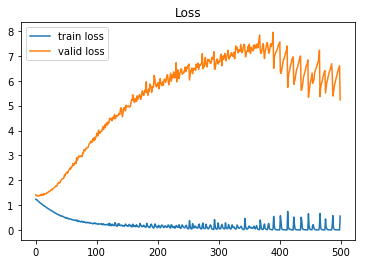

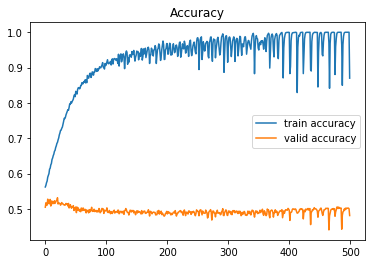

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [11]:
model2.fit(x_train, y_train, 
          epochs=500,   #epoch測試 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.2688 - accuracy: 0.1480 - val_loss: 2.2238 - val_accuracy: 0.1923
Epoch 2/500
50000/50000 [==============================] - 5s 92us/step - loss: 2.1937 - accuracy: 0.2203 - val_loss: 2.1680 - val_accuracy: 0.2479
Epoch 3/500
50000/50000 [==============================] - 5s 96us/step - loss: 2.1435 - accuracy: 0.2514 - val_loss: 2.1227 - val_accuracy: 0.2603
Epoch 4/500
50000/50000 [==============================] - 5s 103us/step - loss: 2.1003 - accuracy: 0.2680 - val_loss: 2.0817 - val_accuracy: 0.2759
Epoch 5/500
50000/50000 [==============================] - 5s 106us/step - loss: 2.0627 - accuracy: 0.2796 - val_loss: 2.0479 - val_accuracy: 0.2868
Epoch 6/500
50000/50000 [==============================] - 6s 111us/step - loss: 2.0319 - accuracy: 0.2910 - val_loss: 2.0206 - val_accuracy: 0.2939
Epoch 7/500
50000/50000 [==============================] - 

50000/50000 [==============================] - 5s 105us/step - loss: 1.6732 - accuracy: 0.4170 - val_loss: 1.6797 - val_accuracy: 0.4156
Epoch 56/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6700 - accuracy: 0.4194 - val_loss: 1.6755 - val_accuracy: 0.4179
Epoch 57/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6670 - accuracy: 0.4203 - val_loss: 1.6733 - val_accuracy: 0.4162
Epoch 58/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6636 - accuracy: 0.4219 - val_loss: 1.6717 - val_accuracy: 0.4162
Epoch 59/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6609 - accuracy: 0.4223 - val_loss: 1.6684 - val_accuracy: 0.4176
Epoch 60/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6576 - accuracy: 0.4233 - val_loss: 1.6650 - val_accuracy: 0.4190
Epoch 61/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6547 - accuracy: 0.4250 - val

50000/50000 [==============================] - 5s 104us/step - loss: 1.5367 - accuracy: 0.4668 - val_loss: 1.5620 - val_accuracy: 0.4502
Epoch 110/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5351 - accuracy: 0.4679 - val_loss: 1.5572 - val_accuracy: 0.4574
Epoch 111/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.5331 - accuracy: 0.4686 - val_loss: 1.5538 - val_accuracy: 0.4565
Epoch 112/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5313 - accuracy: 0.4685 - val_loss: 1.5582 - val_accuracy: 0.4510
Epoch 113/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.5291 - accuracy: 0.4693 - val_loss: 1.5510 - val_accuracy: 0.4567
Epoch 114/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.5273 - accuracy: 0.4702 - val_loss: 1.5494 - val_accuracy: 0.4610
Epoch 115/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.5254 - accuracy: 0.4705

50000/50000 [==============================] - 10s 200us/step - loss: 1.4439 - accuracy: 0.4978 - val_loss: 1.4894 - val_accuracy: 0.4772
Epoch 164/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.4426 - accuracy: 0.4979 - val_loss: 1.4837 - val_accuracy: 0.4774
Epoch 165/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.4404 - accuracy: 0.4993 - val_loss: 1.4886 - val_accuracy: 0.4739
Epoch 166/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.4392 - accuracy: 0.4982 - val_loss: 1.4827 - val_accuracy: 0.4790
Epoch 167/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.4375 - accuracy: 0.4991 - val_loss: 1.4799 - val_accuracy: 0.4798
Epoch 168/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.4360 - accuracy: 0.4999 - val_loss: 1.4819 - val_accuracy: 0.4736
Epoch 169/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.4347 - accuracy:

Epoch 217/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.3634 - accuracy: 0.5249 - val_loss: 1.4387 - val_accuracy: 0.4916
Epoch 218/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.3621 - accuracy: 0.5258 - val_loss: 1.4355 - val_accuracy: 0.4931
Epoch 219/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.3603 - accuracy: 0.5251 - val_loss: 1.4309 - val_accuracy: 0.4942
Epoch 220/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.3593 - accuracy: 0.5264 - val_loss: 1.4290 - val_accuracy: 0.4932
Epoch 221/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.3576 - accuracy: 0.5263 - val_loss: 1.4365 - val_accuracy: 0.4887
Epoch 222/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.3568 - accuracy: 0.5271 - val_loss: 1.4339 - val_accuracy: 0.4926
Epoch 223/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.355

Epoch 271/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.2922 - accuracy: 0.5474 - val_loss: 1.3969 - val_accuracy: 0.5047
Epoch 272/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.2914 - accuracy: 0.5486 - val_loss: 1.3865 - val_accuracy: 0.5064
Epoch 273/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.2902 - accuracy: 0.5485 - val_loss: 1.3926 - val_accuracy: 0.5086
Epoch 274/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2892 - accuracy: 0.5506 - val_loss: 1.3887 - val_accuracy: 0.5076
Epoch 275/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.2875 - accuracy: 0.5496 - val_loss: 1.3850 - val_accuracy: 0.5090
Epoch 276/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.2858 - accuracy: 0.5503 - val_loss: 1.3875 - val_accuracy: 0.5122
Epoch 277/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.2853 - 

50000/50000 [==============================] - 5s 105us/step - loss: 1.2297 - accuracy: 0.5700 - val_loss: 1.3763 - val_accuracy: 0.5107
Epoch 326/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2286 - accuracy: 0.5692 - val_loss: 1.3625 - val_accuracy: 0.5161
Epoch 327/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.2263 - accuracy: 0.5714 - val_loss: 1.3604 - val_accuracy: 0.5198
Epoch 328/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2263 - accuracy: 0.5721 - val_loss: 1.3661 - val_accuracy: 0.5156
Epoch 329/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.2247 - accuracy: 0.5725 - val_loss: 1.3730 - val_accuracy: 0.5123
Epoch 330/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2240 - accuracy: 0.5726 - val_loss: 1.3611 - val_accuracy: 0.5161
Epoch 331/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.2219 - accuracy: 0.5729

50000/50000 [==============================] - 5s 108us/step - loss: 1.1698 - accuracy: 0.5930 - val_loss: 1.3560 - val_accuracy: 0.5161
Epoch 380/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.1675 - accuracy: 0.5917 - val_loss: 1.3523 - val_accuracy: 0.5215
Epoch 381/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.1684 - accuracy: 0.5937 - val_loss: 1.3652 - val_accuracy: 0.5223
Epoch 382/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1663 - accuracy: 0.5926 - val_loss: 1.3906 - val_accuracy: 0.5084
Epoch 383/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1654 - accuracy: 0.5946 - val_loss: 1.3561 - val_accuracy: 0.5170
Epoch 384/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1633 - accuracy: 0.5946 - val_loss: 1.3432 - val_accuracy: 0.5226
Epoch 385/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1621 - accuracy: 0.5944

50000/50000 [==============================] - 5s 104us/step - loss: 1.1144 - accuracy: 0.6108 - val_loss: 1.3395 - val_accuracy: 0.5267
Epoch 434/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1127 - accuracy: 0.6121 - val_loss: 1.3400 - val_accuracy: 0.5256
Epoch 435/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1107 - accuracy: 0.6137 - val_loss: 1.3397 - val_accuracy: 0.5276
Epoch 436/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1083 - accuracy: 0.6152 - val_loss: 1.3464 - val_accuracy: 0.5266
Epoch 437/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.1097 - accuracy: 0.6140 - val_loss: 1.3284 - val_accuracy: 0.5325
Epoch 438/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1079 - accuracy: 0.6142 - val_loss: 1.3427 - val_accuracy: 0.5271
Epoch 439/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1078 - accuracy: 0.6153

50000/50000 [==============================] - 5s 105us/step - loss: 1.0568 - accuracy: 0.6316 - val_loss: 1.3725 - val_accuracy: 0.5212
Epoch 488/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0546 - accuracy: 0.6331 - val_loss: 1.3462 - val_accuracy: 0.5243
Epoch 489/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0561 - accuracy: 0.6319 - val_loss: 1.3563 - val_accuracy: 0.5190
Epoch 490/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.0548 - accuracy: 0.6331 - val_loss: 1.3463 - val_accuracy: 0.5245
Epoch 491/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0529 - accuracy: 0.6340 - val_loss: 1.3514 - val_accuracy: 0.5242
Epoch 492/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0533 - accuracy: 0.6344 - val_loss: 1.3644 - val_accuracy: 0.5263
Epoch 493/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0513 - accuracy: 0.6350

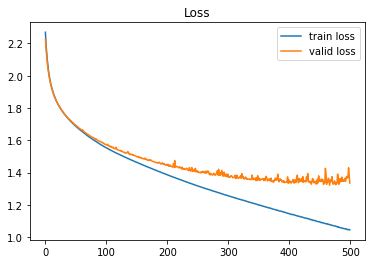

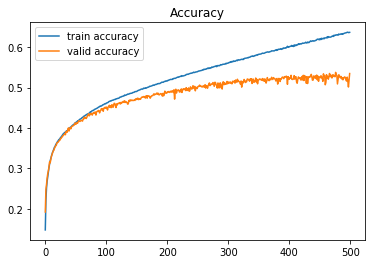

In [12]:
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()